In [19]:
import torch as t
import torch.nn as nn
import matplotlib.pyplot as plt

In [20]:
a = t.rand((10))

a.shape

torch.Size([10])

In [21]:
a[:, None].shape

torch.Size([10, 1])

In [10]:
(a[:, None] + a).shape

torch.Size([10, 10])

In [30]:
import pdb

class fourierImage(nn.Module):
    def __init__(self, scale=1.0, sigmoid=False, learnable_scale=False):
        super().__init__()
        self.freq = nn.Parameter(t.randn(1, 3, 224, 113, 2))
        H, W = self.freq.shape[2:4]
        fx = t.fft.fftfreq(H)[:,None] 
        fy = t.fft.fftfreq(W)
        freq_magnitude = (fx**2 + fy**2).sqrt()
        freq_magnitude[0, 0] = 1/H
        self.register_buffer('freq_magnitude', freq_magnitude)
        if learnable_scale:
            self.scale = nn.Parameter(torch.Tensor([scale]))
        else:
            self.scale = scale
        self.sigmoid = sigmoid
        
    def forward(self):       
        freq_complex = t.view_as_complex(self.freq)
        image = t.fft.irfft2(freq_complex / self.freq_magnitude)
        image = image * self.scale + 0.5
        if self.sigmoid:
            return image.sigmoid()
        else:
            return t.clip(image, min=0.0, max=1.0)

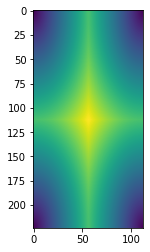

In [36]:
fi = fourierImage()
H, W = 224, 113
t.fft.fftfreq(H)

fx = t.fft.fftfreq(H)[:,None] 
fy = t.fft.fftfreq(W)
freq_magnitude = (fx**2 + fy**2).sqrt()

plt.imshow(fx + fy)
plt.imshow(freq_magnitude)

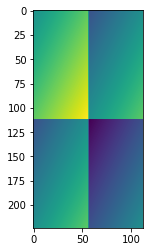

In [59]:
for i in range(100):
    a = t.rand((10,)).float()
    norm = t.einsum('a,a->', a, a).sqrt()
    assert t.allclose(norm, a.norm())
    